In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("heart.csv")
print(df.shape)
df.head()

(1025, 14)


age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0

In [3]:
from sklearn.model_selection import train_test_split

X, y = df.drop('target', axis=1), df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=9)

### Scale-Insensitive

In [4]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=9)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=9)

In [5]:
from sklearn.naive_bayes import GaussianNB
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [6]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, y_train)

GradientBoostingClassifier()

### Scale-sensitive

In [7]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [8]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [9]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()
log.fit(X_train_scaled, y_train)

LogisticRegression()

In [10]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train_scaled, y_train)

SVC()

In [11]:
forest.score(X_test, y_test)

0.9853658536585366

In [12]:
nb_clf.score(X_test, y_test)

0.8463414634146341

In [13]:
gb_clf.score(X_test, y_test)

0.9707317073170731

In [14]:
knn.score(X_test_scaled, y_test)

0.8536585365853658

In [15]:
log.score(X_test_scaled, y_test)

0.8731707317073171

In [16]:
svc.score(X_test_scaled, y_test)

0.9341463414634147

In [17]:
import time

In [18]:
from sklearn.metrics import  recall_score

y_pred = forest.predict(X_test)
print('Forest:', recall_score(y_test, y_pred))
t = 1.5
time.sleep(t)


y_pred = nb_clf.predict(X_test)
print('NB:', recall_score(y_test, y_pred))
time.sleep(t)

y_pred = gb_clf.predict(X_test)
print('GB:', recall_score(y_test, y_pred))
time.sleep(t)

y_pred = knn.predict(X_test_scaled)
print('KNN:', recall_score(y_test, y_pred))
time.sleep(t)


y_pred = log.predict(X_test_scaled)
print('LOG:', recall_score(y_test, y_pred))
time.sleep(t)


y_pred = svc.predict(X_test_scaled)
print('SVC:', recall_score(y_test, y_pred))
time.sleep(t)



Forest: 0.9859154929577465
NB: 0.9014084507042254
GB: 0.9859154929577465
KNN: 0.8732394366197183
LOG: 0.92018779342723
SVC: 0.9530516431924883


<function matplotlib.pyplot.show(close=None, block=None)>

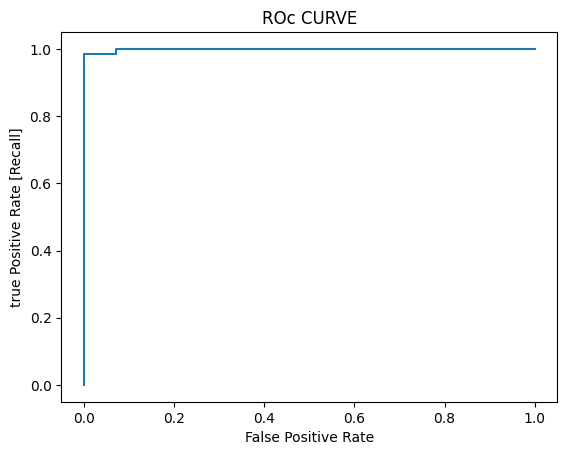

In [19]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score


y_preds = forest.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_preds)
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("true Positive Rate [Recall]")
plt.title("ROc CURVE")
plt.show

In [20]:
roc_auc_score(y_test, y_preds)

0.9989990705655251

### Hyperparameter Tuning

In [21]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators' : [100, 200, 500],
    'max_depth' : [None, 10, 20, 30], 
    'min_samples_split' : [2, 5, 10], 
    'min_samples_leaf' : [1, 2, 4],  
    'max_features' : ['sqrt', 'log2', None] 
}


forest = RandomForestClassifier(n_jobs= -1, random_state=9)
grid_search = GridSearchCV(forest, param_grid, cv=3, n_jobs= -1, verbose=2)

In [22]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(n_jobs=-1, random_state=9),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 500]},
             verbose=2)

In [23]:
best_forest = grid_search.best_estimator_

In [24]:
best_forest

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=9)

### Feature importance's

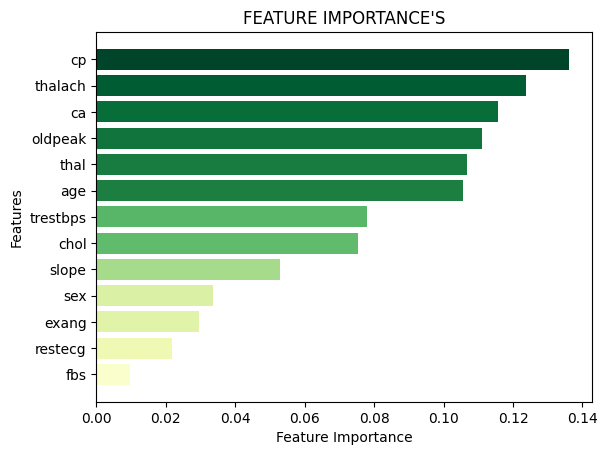

In [25]:
import numpy as np

feature_importances = best_forest.feature_importances_
features = best_forest.feature_names_in_
sorted_idx = np.argsort(feature_importances)
sorted_features = features[sorted_idx]
sorted_importances = feature_importances[sorted_idx]

colors = plt.cm.YlGn(sorted_importances / max(sorted_importances))
plt.barh(sorted_features, sorted_importances, color=colors)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title("FEATURE IMPORTANCE'S")
plt.show()

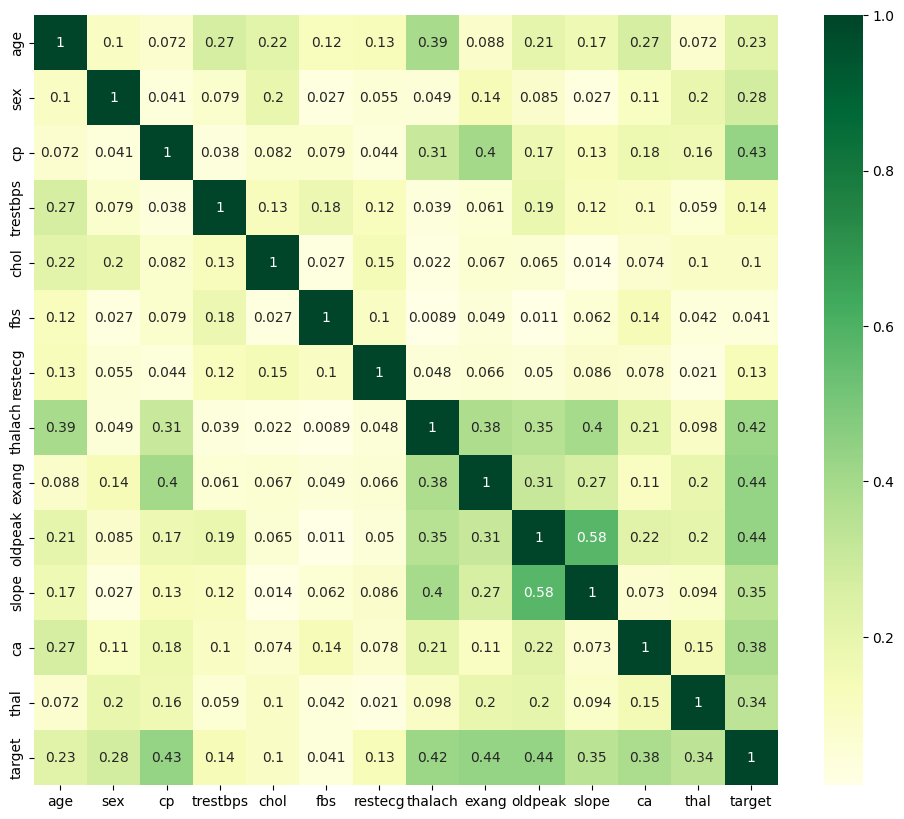

In [26]:
import seaborn as sns

plt.figure(figsize=[12,10])
sns.heatmap(abs(df.corr()), annot=True, cmap='YlGn')
plt.show()

In [27]:
best_forest.predict([[40, 1,0, 120, 212, 0, 1, 160, 0, 1.0, 2, 2, 3]])

C:\Users\lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [28]:
df.head(1)

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   

   ca  thal  target  
0   2     3       0